# Mean shift

MeanShift clustering aims to discover blobs in a smooth density of samples. <br>
It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region.<br>

https://scikit-learn.org/stable/modules/clustering.html#mean-shift



In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

from classes.ClusterModel import ClusterModel

import pickle

In [2]:
df_clientes = pd.read_csv("../data/processados/clientes.csv")

In [3]:
df_clientes.columns

Index(['Id', 'Idade', 'EstadoCivil', 'BillingCity', 'ScoreNivelConhecimento',
       'PerfilInvestidor', 'RendaMensal', 'ValorPatrimonio', 'ScoreObjetivos',
       'ScoreSituacaoFinanceira', 'ScoreRisco', 'P_investidor',
       'b_renda_mensal', 'b_idade', 'tempo_dinheiro_inves', 'resgate_dia',
       'inves_renda_mensal', 'possivel_renda_investida_mes'],
      dtype='object')

In [4]:
df_ml = df_clientes[['P_investidor', 'b_renda_mensal',
                    'tempo_dinheiro_inves', 'resgate_dia', 'inves_renda_mensal']]

In [5]:
df_ml.head()

,P_investidor,b_renda_mensal,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal
0,conservador,"(-50.0, 10000.0]",1_ano,30,10
1,conservador,"(-50.0, 10000.0]",inder,0,20
2,conservador,"(-50.0, 10000.0]",inder,100,10
3,moderado,"(-50.0, 10000.0]",1_a_5_anos,0,50
4,conservador,"(-50.0, 10000.0]",1_a_5_anos,50,10


In [6]:
df_ml.dropna(inplace=True)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_ml.isnull().sum()

P_investidor            0
b_renda_mensal          0
tempo_dinheiro_inves    0
resgate_dia             0
inves_renda_mensal      0
dtype: int64

In [8]:
df_ml.shape

(13331, 5)

In [9]:
cluster_model = ClusterModel(df_ml)

In [10]:
df_cluster, model= cluster_model.mean_shift()

In [11]:
pickle.dump(model, open(f'../models/affinity_prop_clientes_{dt.datetime.now()}.pkl','wb'))

In [12]:
df_cluster['cluster'].value_counts()

0    11269
1     1467
2      371
3      128
4       96
Name: cluster, dtype: int64

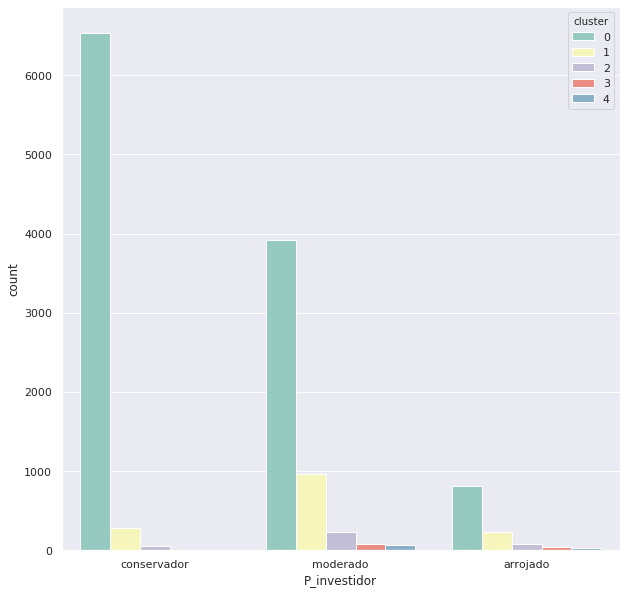

In [13]:
plt.figure(figsize=(10,10))
sns.countplot("P_investidor", hue="cluster", data=df_cluster)